# 🏅 Olympics Athlete Performance Study

This project analyzes historical Olympic data to understand how athlete performance and medal distribution vary by country, gender, year, and sport.

**Key Objectives:**
- Explore how medals are distributed across countries and genders.
- Visualize trends over time.
- Analyze athlete age distributions in various sports.

**Tools Used:** Python, Pandas, Seaborn, Matplotlib, Jupyter Notebook  
**Dataset Source:** [Kaggle – 120 years of Olympic history](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For nicer plots
sns.set(style="whitegrid")


## 📥 Load and Preview the Dataset

We begin by loading the Olympic athlete dataset using Pandas. This dataset contains information about athletes, their demographics, sports, events, and medal outcomes from over 120 years of Olympic history.

The first few rows (`.head()`) are displayed to understand the structure of the data.


In [2]:
df = pd.read_csv("athlete_events.csv")
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 🧾 Dataset Overview and Medal Count

We inspect the structure of the dataset using `.info()` to understand the number of entries, column types, and missing values.

Next, we use `.value_counts()` on the `Medal` column (with `dropna=False`) to see how many athletes received Gold, Silver, Bronze, or no medal at all.


In [3]:
df.info()
df['Medal'].value_counts(dropna=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

## 🏆 Top 10 Countries by Medal Count

This bar chart displays the top 10 National Olympic Committees (NOCs) with the highest number of medals. 

We first filter out rows without medals, then count the number of medals per country using the `NOC` (National Olympic Committee) codes. This helps identify countries with historically strong Olympic performances.


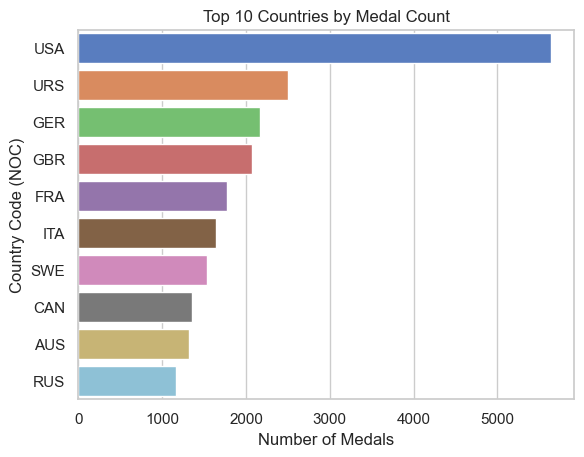

In [4]:
medal_data = df.dropna(subset=['Medal'])
country_medals = medal_data['NOC'].value_counts().head(10)

sns.barplot(x=country_medals.values, y=country_medals.index, hue=country_medals.index, palette='muted', legend=False)
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Country Code (NOC)')
plt.show()


## 🚻 Medal Distribution by Gender

This bar chart shows the total number of medals won by male and female athletes. 

By grouping the data by the `Sex` column and counting the number of medals, we can analyze gender representation and participation in Olympic medal achievements.


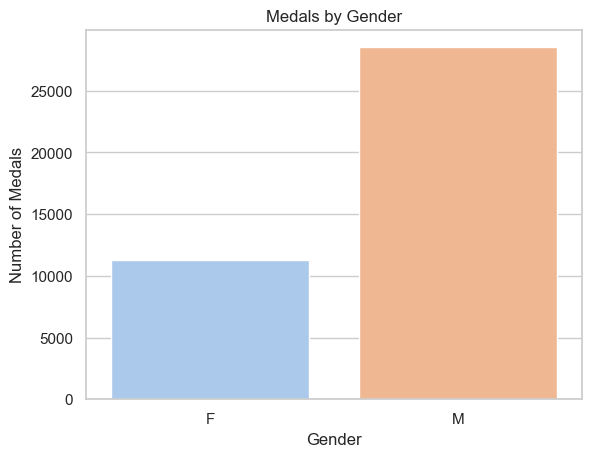

In [5]:
gender_medals = medal_data.groupby('Sex')['Medal'].count()

sns.barplot(x=gender_medals.index, y=gender_medals.values, hue=gender_medals.index, palette='pastel', legend=False)
plt.title('Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()


## 📈 Total Medals Awarded Over Time

This line plot shows how the number of medals awarded has changed throughout Olympic history.

By grouping the data by `Year`, we can observe trends such as increases in participation, the impact of world events (like wars), and overall growth in the Olympic Games.


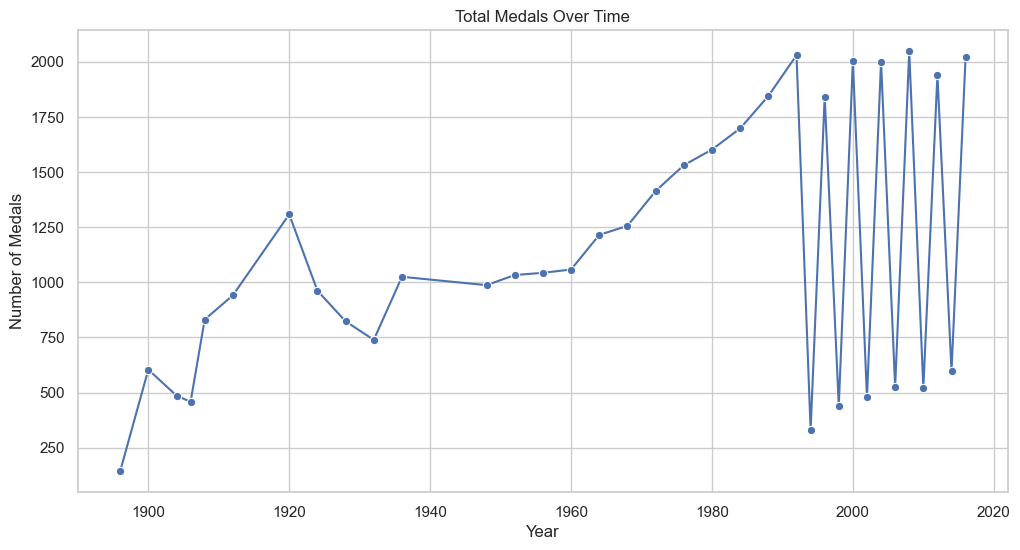

In [6]:
yearly_medals = medal_data.groupby('Year')['Medal'].count()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_medals.index, y=yearly_medals.values, marker='o')
plt.title('Total Medals Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()


## 🎯 Age Distribution of Medal-Winning Athletes by Sport

This violin plot displays how the ages of medal-winning athletes are distributed across different sports.

It helps identify which sports tend to have younger or older athletes. For example, gymnastics often features younger participants, while sports like shooting or equestrian may include older athletes. The inner quartile highlights the most common age range for each sport.


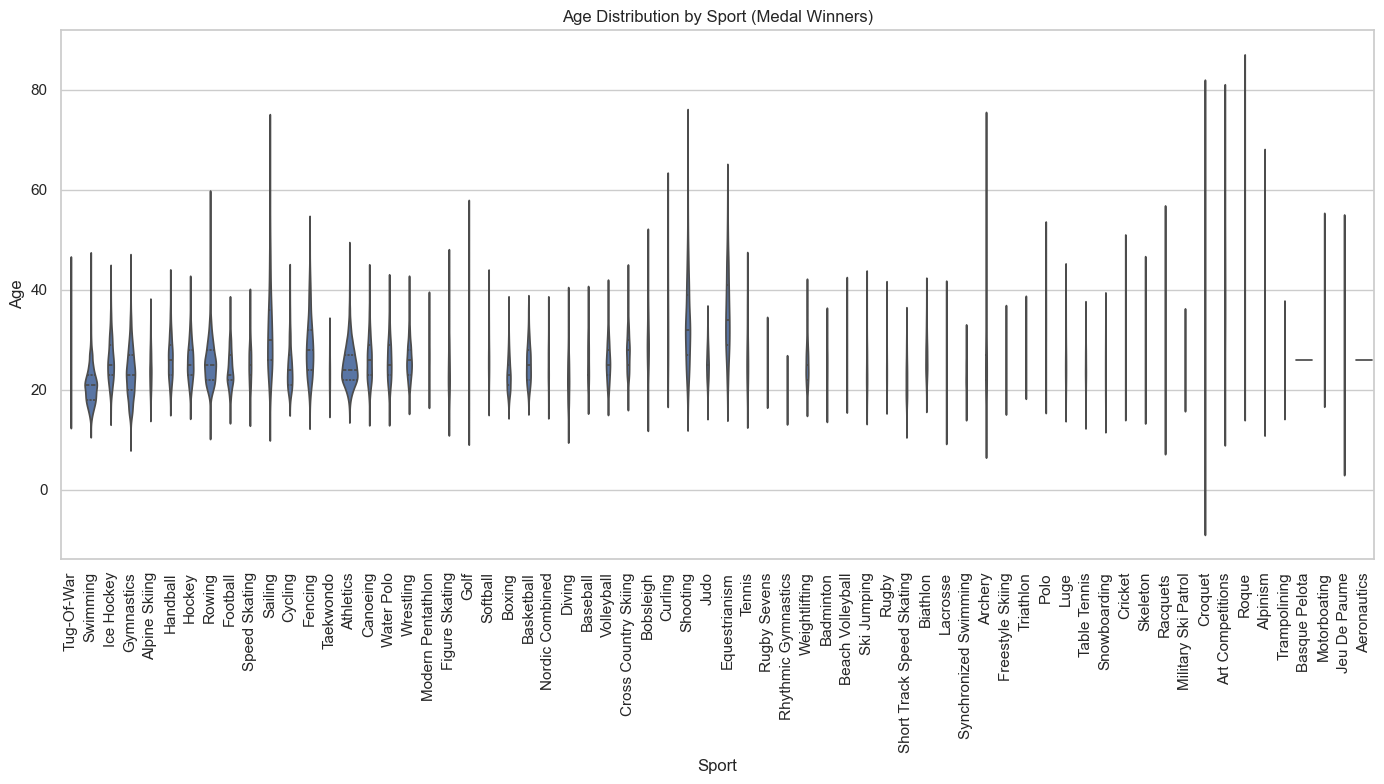

In [7]:
plt.figure(figsize=(14,8))
sns.violinplot(x='Sport', y='Age', data=medal_data, inner='quartile', density_norm='count')
plt.xticks(rotation=90)
plt.title('Age Distribution by Sport (Medal Winners)')
plt.tight_layout()
plt.show()


## 📌 Summary & Insights

- The USA dominates in total medal count historically.
- 🏋️‍♀️ Some sports have younger athletes (e.g., gymnastics), others older (e.g., shooting).
- 👩‍🦰 Gender participation trends show increasing inclusivity.
- 📈 Medal count has grown over time, showing the expanding scale of the Olympics.

This project highlights how data visualization can uncover deep insights from global sports events.
